In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

warnings.filterwarnings("ignore", category=UserWarning)

### IMPORT THE DATA SET


In [2]:
data=pd.read_csv("path.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


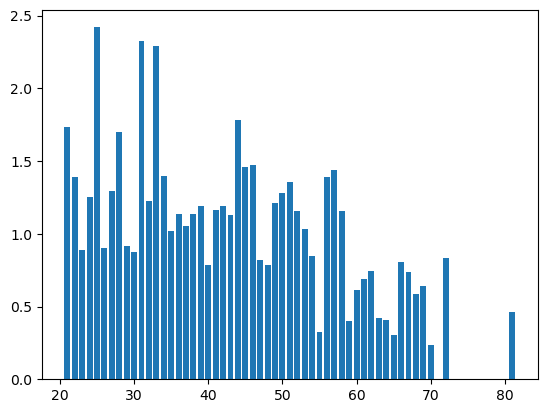

In [4]:
plt.bar(data['Age'],data['DiabetesPedigreeFunction'])
plt.show()

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

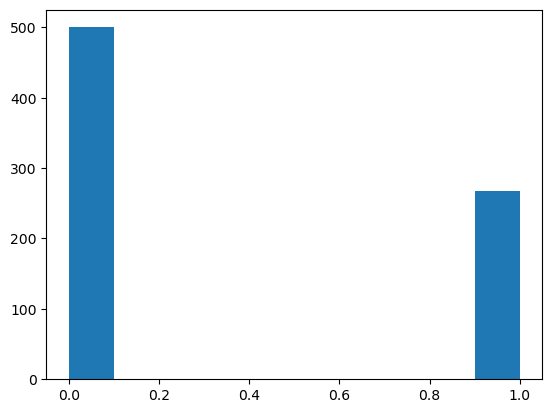

In [5]:
plt.hist(data['Outcome'])

<Axes: xlabel='BMI', ylabel='Density'>

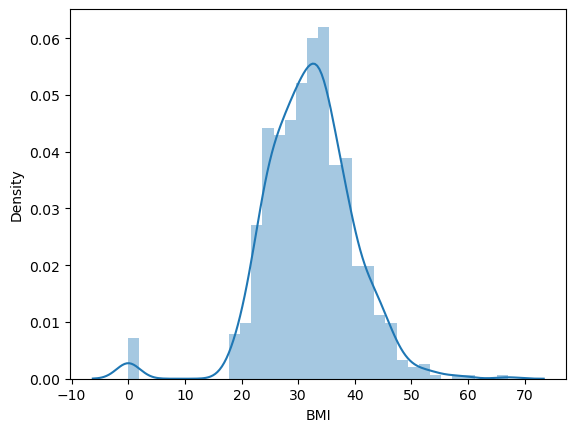

In [6]:
sns.distplot(data['BMI'])



<Axes: >

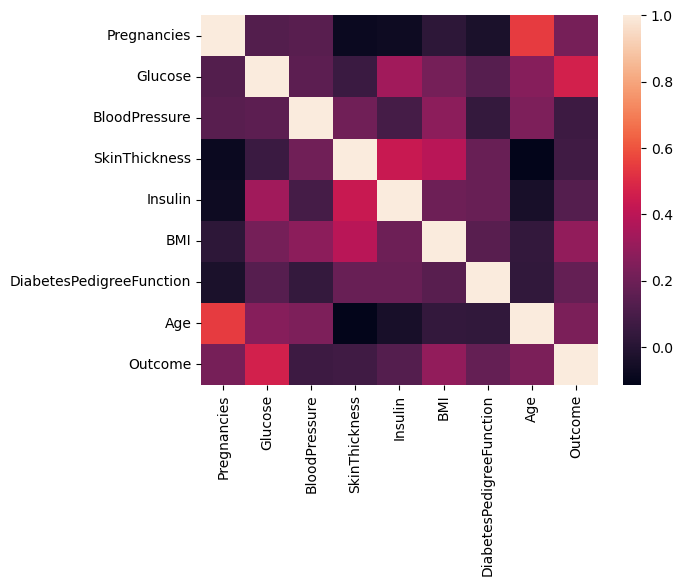

In [7]:
sns.heatmap(data.corr())

### CREATE THE DEPENDENET AND INDEPENDENT VARIABLE

In [8]:
x=data.drop(columns=['Outcome'],)
y=data['Outcome']


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### TEST TRAIN SPLIT

In [10]:
xtrain, xtest, ytrain, ytest=train_test_split(x ,y , test_size=0.2)
xtest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
190,3,111,62,0,0,22.6,0.142,21
383,1,90,62,18,59,25.1,1.268,25
95,6,144,72,27,228,33.9,0.255,40
105,1,126,56,29,152,28.7,0.801,21
328,2,102,86,36,120,45.5,0.127,23


### PIPELINE MODELING 

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('clf', RandomForestClassifier())  # Step 2: RandomForestClassifier
])

In [12]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier())])

In [13]:
ypred = pipeline.predict(xtest)

### PIPRLINE MODEL ACCURACY

In [14]:
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


### LINEAR REGRESSION MODEL

In [15]:
scaler = StandardScaler()
reg=LinearRegression()
reg.fit(xtrain,ytrain)
reg.score(xtrain,ytrain)

0.3415583354817303

In [16]:
forest = RandomForestRegressor()

forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [17]:
forest.score(xtrain,ytrain)

0.9051707126168225

In [18]:
ypredlin=reg.predict(xtest)
ypredlin

array([ 0.07625419,  0.16320434,  0.49362535,  0.32451034,  0.22029245,
        0.38469299, -0.33240953,  0.73892214,  0.66521819,  0.09187402,
        0.46094648,  0.2866075 ,  0.80158099,  0.60181969, -0.05495363,
        0.59208489,  0.3309827 ,  0.6698826 ,  0.43642185,  0.80785467,
        0.31298878,  0.37642409, -0.00408123,  0.85288248,  0.42504396,
        0.3640694 ,  0.32820262,  0.45328947,  0.26765443,  0.35942245,
        0.39728902,  0.16005919,  0.22642583, -0.1009658 ,  0.31229748,
        0.07635446,  0.11221411,  0.19866246,  0.32448523,  0.32945104,
        0.21090131,  0.30900036, -0.22436338,  0.3687465 ,  0.36577672,
        0.27412249,  0.28774444,  0.09212102,  0.31342675,  0.32863214,
       -0.08453311,  0.05112632,  0.06629507, -0.00434827,  0.18435082,
        0.38577854,  0.47096667,  0.31420817, -0.02667157,  0.30971976,
        0.65695145,  0.45325862, -0.57964537,  0.35299999,  0.19999358,
        0.67013467,  0.42920973,  0.5104546 ,  0.76372964,  0.35

In [19]:
variance_ytest = np.var(ytest)
variance_ypredict = np.var(ypredlin)


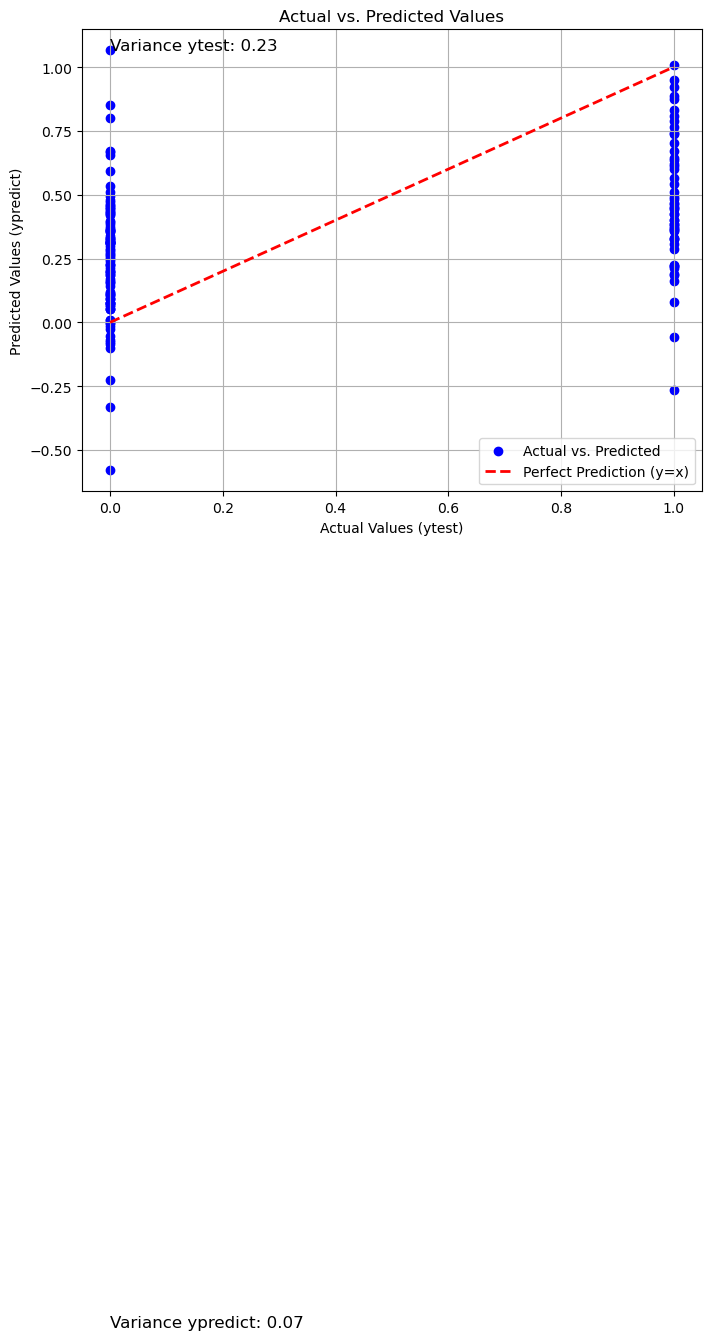

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypredlin, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values (ytest)')
plt.ylabel('Predicted Values (ypredict)')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')

# Add a diagonal line for reference (y = x)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--', lw=2, label='Perfect Prediction (y=x)')

# Display the variances as text in the plot
plt.text(min(ytest), max(ypredlin), f'Variance ytest: {variance_ytest:.2f}', fontsize=12)
plt.text(min(ytest), max(ypredlin) - 5, f'Variance ypredict: {variance_ypredict:.2f}', fontsize=12)

plt.legend()
plt.grid()
plt.show()

In [21]:
threshold = 0.5  # You can adjust this threshold as needed

# Create an empty list to store the categories
categories = []

# Classify predictions based on the threshold
for prediction in ypredlin:
    if prediction >= threshold:
        categories.append(1)
    else:
        categories.append(0)

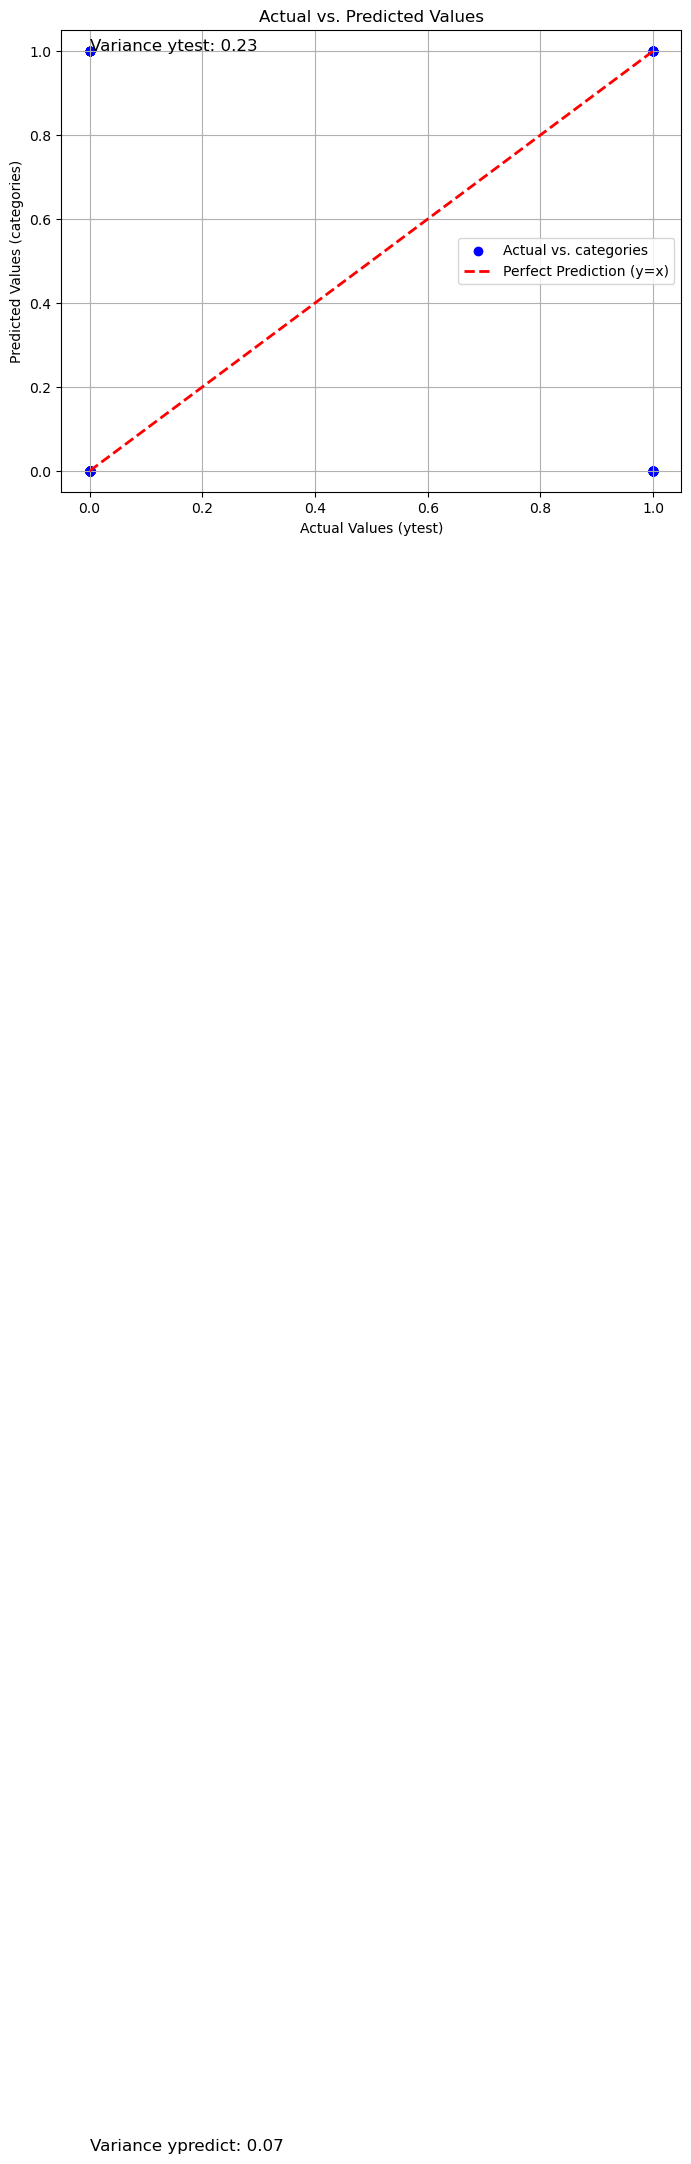

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, categories, c='blue', label='Actual vs. categories')
plt.xlabel('Actual Values (ytest)')
plt.ylabel('Predicted Values (categories)')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')

# Add a diagonal line for reference (y = x)
plt.plot([min(ytest), max(ytest)], [min(categories), max(categories)], color='red', linestyle='--', lw=2, label='Perfect Prediction (y=x)')

# Display the variances as text in the plot
plt.text(min(ytest), max(categories), f'Variance ytest: {variance_ytest:.2f}', fontsize=12)
plt.text(min(ytest), max(categories) - 5, f'Variance ypredict: {variance_ypredict:.2f}', fontsize=12)

plt.legend()
plt.grid()
plt.show()

In [23]:
from sklearn.metrics import r2_score

# Assuming you have already calculated 'y_test' and 'y_predict' as described in previous responses

# Calculate the R-squared score
r_squared = r2_score(ytest, categories)

# Print the R-squared score
print("R-squared Score:", r_squared)


R-squared Score: -0.19777777777777783


### using tensorflow

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define your model using TensorFlow Keras
def create_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Create a TensorFlow model
input_dim = 10  # Update with the actual number of features in your dataset
tensorflow_model = create_model(input_dim)

# Step 3: Create a scikit-learn Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Step 3.1: Standardize features
    ('clf', RandomForestClassifier())  # Step 3.2: RandomForestClassifier
])

# Now, you can use the pipeline for training and prediction
# For training:
# pipeline.fit(X_train, y_train)

# For prediction:
# y_pred = pipeline.predict(X_test)


In [26]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier())])

In [27]:
ypredtf = pipeline.predict(xtest)

In [28]:
accuracy = accuracy_score(ytest,ypredtf)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72
